<a href="https://colab.research.google.com/github/peculab/DFTDescriptorPipeline/blob/main/examples/indigo_diaryl/indigo_diaryl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!rm -rf /usr/local/lib/python3.11/dist-packages/descriptors

In [9]:
# ✅ Reset environment
%cd /content
import shutil, os, sys, importlib

# 🔁 Uninstall pip-installed descriptors
!pip uninstall -y descriptors

# 🔥 Clear cached modules
for k in list(sys.modules.keys()):
    if k.startswith("descriptors"):
        del sys.modules[k]

# 🧹 Remove previous repo
if os.path.exists("DFTDescriptorPipeline"):
    shutil.rmtree("DFTDescriptorPipeline")

/content


In [10]:
# ✅ Install required packages
!pip install morfeus-ml scikit-learn joblib matplotlib openpyxl

# ✅ Clone the latest repo
!git clone https://github.com/peculab/DFTDescriptorPipeline.git

Cloning into 'DFTDescriptorPipeline'...
remote: Enumerating objects: 498, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 498 (delta 92), reused 91 (delta 34), pack-reused 321 (from 1)
Receiving objects: 100% (498/498), 35.30 MiB | 19.89 MiB/s, done.
Resolving deltas: 100% (300/300), done.
Updating files: 100% (96/96), done.


In [11]:
# ✅ Set module path
from morfeus import read_xyz, Sterimol
from morfeus.utils import get_radii

import shutil, os, sys, importlib
sys.path.insert(0, "/content/DFTDescriptorPipeline/descriptors")
import extractor_regr
import glob, os
importlib.reload(extractor_regr)

<module 'extractor_regr' from '/content/DFTDescriptorPipeline/descriptors/extractor_regr.py'>

In [12]:
data_dir = "/content/DFTDescriptorPipeline/examples/indigo_diaryl"
xlsx_path = glob.glob(os.path.join(data_dir, "*.xlsx"))[0]
log_folder = os.path.join(data_dir, "logfiles")

In [13]:
# ✅ Create Ar = Ar2
import pandas as pd

modified_xlsx_path = "/content/DFTDescriptorPipeline/examples/azoarene/indigo_diaryl_with_Ar.xlsx"

df = pd.read_excel(xlsx_path)

df["Ar"] = df["Ar2"]

df.to_excel(modified_xlsx_path, index=False)

print("✔ new xlsx_path =", modified_xlsx_path)

✔ new xlsx_path = /content/DFTDescriptorPipeline/examples/azoarene/indigo_diaryl_with_Ar.xlsx



[STEP1] Read Excel: /content/DFTDescriptorPipeline/examples/azoarene/indigo_diaryl_with_Ar.xlsx

==== [1/13] [4-OMe] Processing log: /content/DFTDescriptorPipeline/examples/indigo_diaryl/logfiles/4-OMe.log ====
  polarizability: 108.24033333333334
  HOMO: -0.29463, LUMO: -0.01555
  dipole: 3.6383
  nbo_section: ok
Found C1: 7, C2: 6, A: 9, B: 16, D: 8, F: 1, G: 5
  atom index: c=7, e=6, a=9, b=16, d=8, f=1, g=5
  NBO values: 1.99444, -1.01736, 1.97621, -0.8253
  NBO charges: C1=0.80569, C2=-0.21608, O1=-0.61072, O2=-0.70529
  frequencies: I_C_O=444.9562, v_C_O=1839.2772
  C1, C2, L_C1_C2: (2.582619, -0.022612, 6.8e-05), (1.106499, 0.051092, 3.2e-05), 1.4779589085329812

==== [2/13] [H] Processing log: /content/DFTDescriptorPipeline/examples/indigo_diaryl/logfiles/H.log ====
  polarizability: 87.51300000000002
  HOMO: -0.32424, LUMO: -0.02742
  dipole: 2.0759
  nbo_section: ok
Found C1: 7, C2: 6, A: 9, B: 15, D: 8, F: 1, G: 5
  atom index: c=7, e=6, a=9, b=15, d=8, f=1, g=5
  NBO value

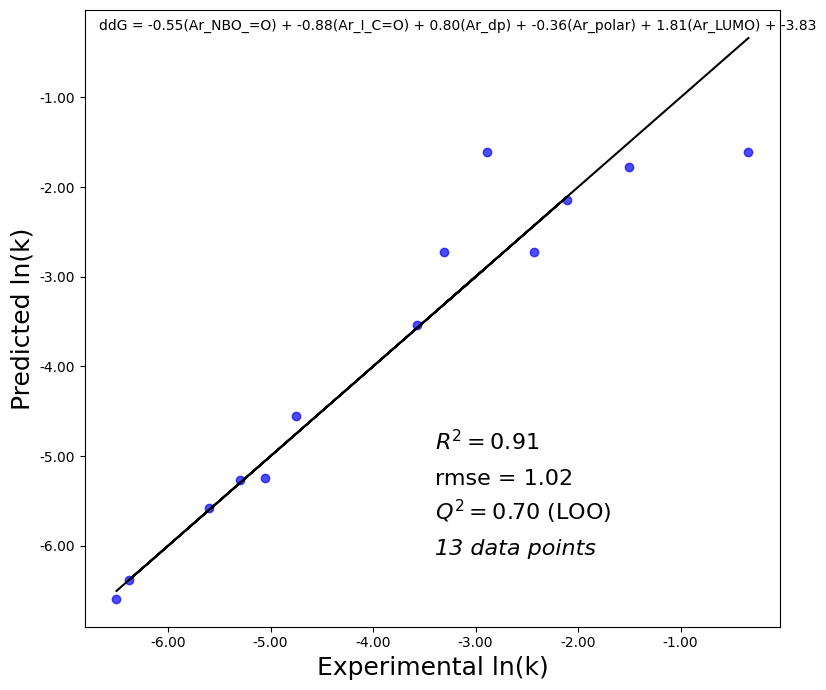


[STEP4] Analysis complete!


In [14]:
# One click execution
df, results, best_model = extractor_regr.run_full_pipeline(
    log_folder=log_folder,
    xlsx_path=modified_xlsx_path,
    target='ln(kobs)'
)